In [1]:
from glob import glob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import dataframe_image as dfi

data_prefix = 'xxx'
pd.options.display.float_format = "{:,.4f}".format

log_files   = glob(f'../checkpoints/{data_prefix}_*/_log.csv')

In [2]:
def trim_all_columns(df):
    trim_strings = lambda x: x.strip().lower() if isinstance(x, str) else x
    return df.applymap(trim_strings)

log_content = [pd.read_csv(log_file, header=None, names=['method', 'optimizer', 'n_epoch', 'epoch', 'loss_train', 'loss_test', 'psnr_train', 'psnr_test', 'time_train', 'time_test', 'Empty' ]) for log_file in log_files]
log_content = pd.concat(log_content)
log_content = trim_all_columns(log_content)
log_content = log_content.drop('Empty', axis=1)
log_content.head()

,method,optimizer,n_epoch,epoch,loss_train,loss_test,psnr_train,psnr_test,time_train,time_test
0,fsrcnn,adadelta,10,1,0.3201,0.1793,5.2590,14.9276,5.1110,0.0140
1,fsrcnn,adadelta,10,2,0.3195,0.1790,5.4231,14.9436,4.9892,0.0100
2,fsrcnn,adadelta,10,3,0.3190,0.1786,5.1833,14.9606,5.0874,0.0120
3,fsrcnn,adadelta,10,4,0.3184,0.1783,5.2332,14.9790,5.0070,0.0130
4,fsrcnn,adadelta,10,5,0.3177,0.1778,5.4638,14.9991,4.9781,0.0140


-----adadelta--------


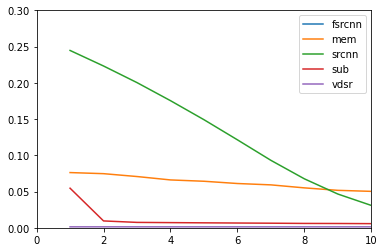

-----adagrad--------


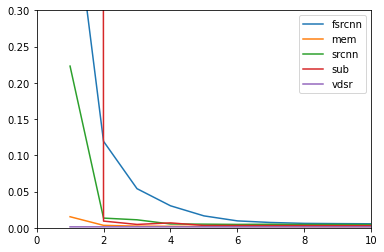

-----adam--------


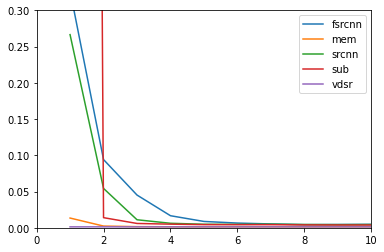

-----adamax--------


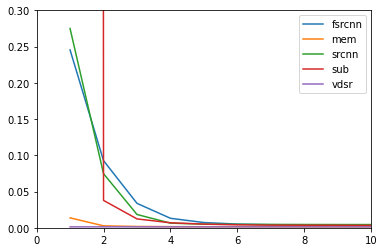

-----lamb--------


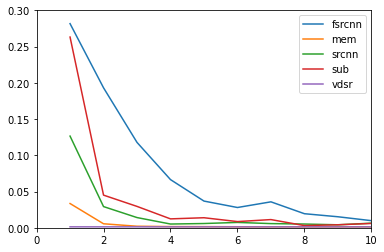

-----rmsprop--------


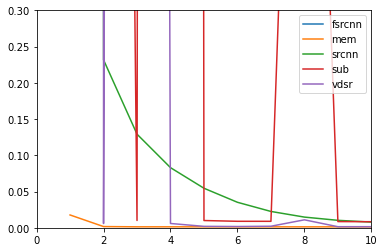

-----rprop--------


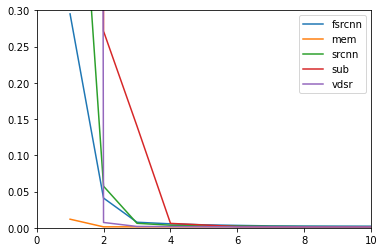

-----sgd--------


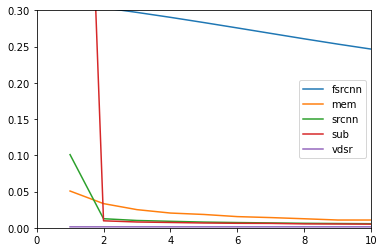

In [44]:
column = 'loss_train'
optimizers = log_content.groupby('optimizer').size().to_frame().reset_index()
for i, row in optimizers.iterrows():
    optimizer = row.optimizer
    print(f"-----{optimizer}--------")
    methods = log_content[log_content.optimizer == optimizer].groupby('method').size().to_frame().reset_index()
    for j, row_method in methods.iterrows():
        method = row_method.method
        
        df = log_content[(log_content.optimizer == optimizer) & (log_content.method == method)][['epoch',column]]

        plt.plot(df['epoch'], df[column], label=method)
        plt.axis([0, len(df['epoch']),0,0.3])
        plt.legend()
    plt.show()

-----fsrcnn--------


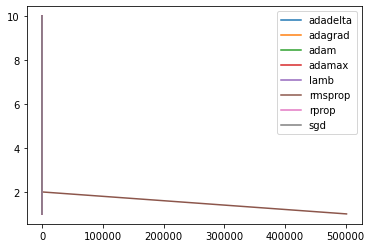

-----mem--------


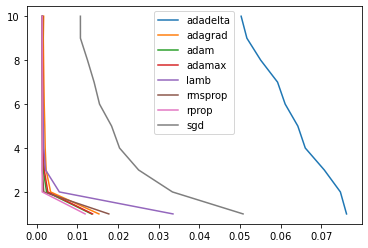

-----srcnn--------


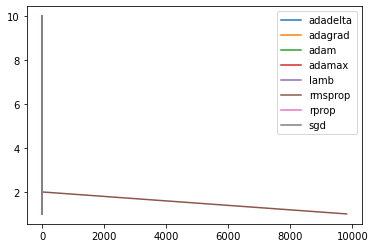

-----sub--------


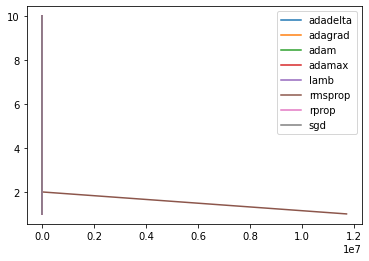

-----vdsr--------


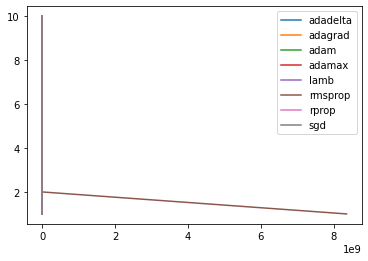

In [40]:
column = 'loss_train'
methods = log_content.groupby('method').size().to_frame().reset_index()
for i, row in methods.iterrows():
    method = row.method
    print(f"-----{method}--------")
    optimizers = log_content[log_content.method == method].groupby('optimizer').size().to_frame().reset_index()
    for j, row_optimizer in optimizers.iterrows():
        optimizer = row_optimizer.optimizer
        
        df = log_content[(log_content.optimizer == optimizer) & (log_content.method == method)][['epoch',column]]

        plt.plot(df[column], df['epoch'], label=optimizer)
        plt.legend()
    plt.show()